In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data as DataFrame

In [4]:
df = pd.read_csv("Customer Churn.csv")
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

### Replacing blank values from Total Charges column to 0 as tenure is 0 and no total charges are recorded

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

### Checking null values in the dataframe

In [6]:
check_null = df.isnull().sum().sum()
print(check_null)

0


In [7]:
describe = df.describe()
print(describe)

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


## Checking Duplicates in the Data

In [61]:
duplicates = df["customerID"].duplicated().sum()
print(duplicates)

0


## Function for creating yes and no values for SeniorCitizen column

In [8]:
def convert(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(convert)
print(df.head())

   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            no     Yes         No       1           No   
1  5575-GNVDE    Male            no      No         No      34          Yes   
2  3668-QPYBK    Male            no      No         No       2          Yes   
3  7795-CFOCW    Male            no      No         No      45           No   
4  9237-HQITU  Female            no      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessB

## Creating count Plot to check the count of people churned out 

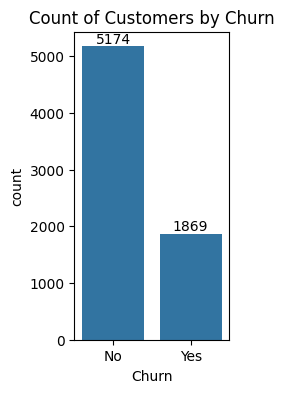

In [28]:
plt.figure(figsize = (2,4))
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

## Plotting a Pie Chart

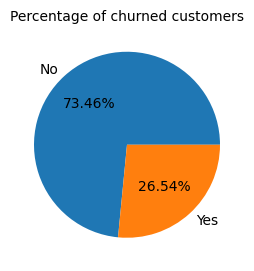

In [21]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})

plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

### From the given pie chart we conclued that 26.54% of our customers have churned out
### Now lets explore the reason behind it

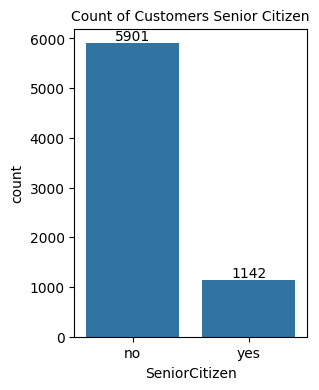

In [34]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers Senior Citizen", fontsize = 10)
plt.show()


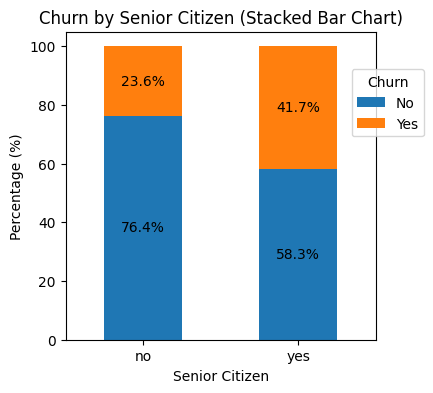

In [43]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack() * 100

#plot
fig, ax = plt.subplots(figsize = (4,4))  # Adjudting figsize for better visualization

# plotting the bars
total_counts.plot(kind = 'bar', stacked = True, ax = ax, color = ['#1f77b4', '#ff7f0e'])  # color customization

# Adding percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y= p.get_xy()
    ax.text(x + width / 2, y+ height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title("Churn by Senior Citizen (Stacked Bar Chart)")
plt.xlabel('Senior Citizen')
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Churn", bbox_to_anchor = (0.9,0.9)) # Customizing Legend Location
plt.show()


### Comparatively a greater percentage of people in senior citizen category have Churned out

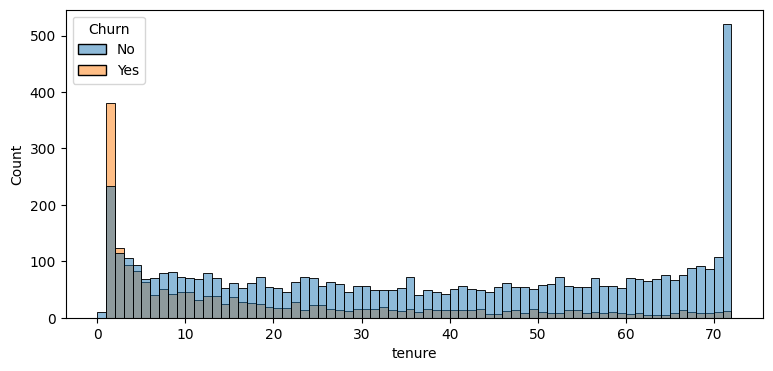

In [44]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure", data=df, bins= 72, hue="Churn")
plt.show()

### People who have used our services for a long time have stayed and people who have used our services
### for 1 or 2 months have churned out

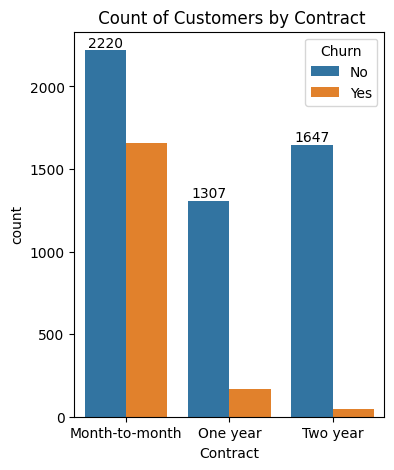

In [45]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x="Contract", data = df, hue="Churn")

ax.bar_label(ax.containers[0])
plt.title(" Count of Customers by Contract")
plt.show()

### People who have Month-to-month contract are likely to churn more then from those who 
### have 1 or 2 years of contract

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


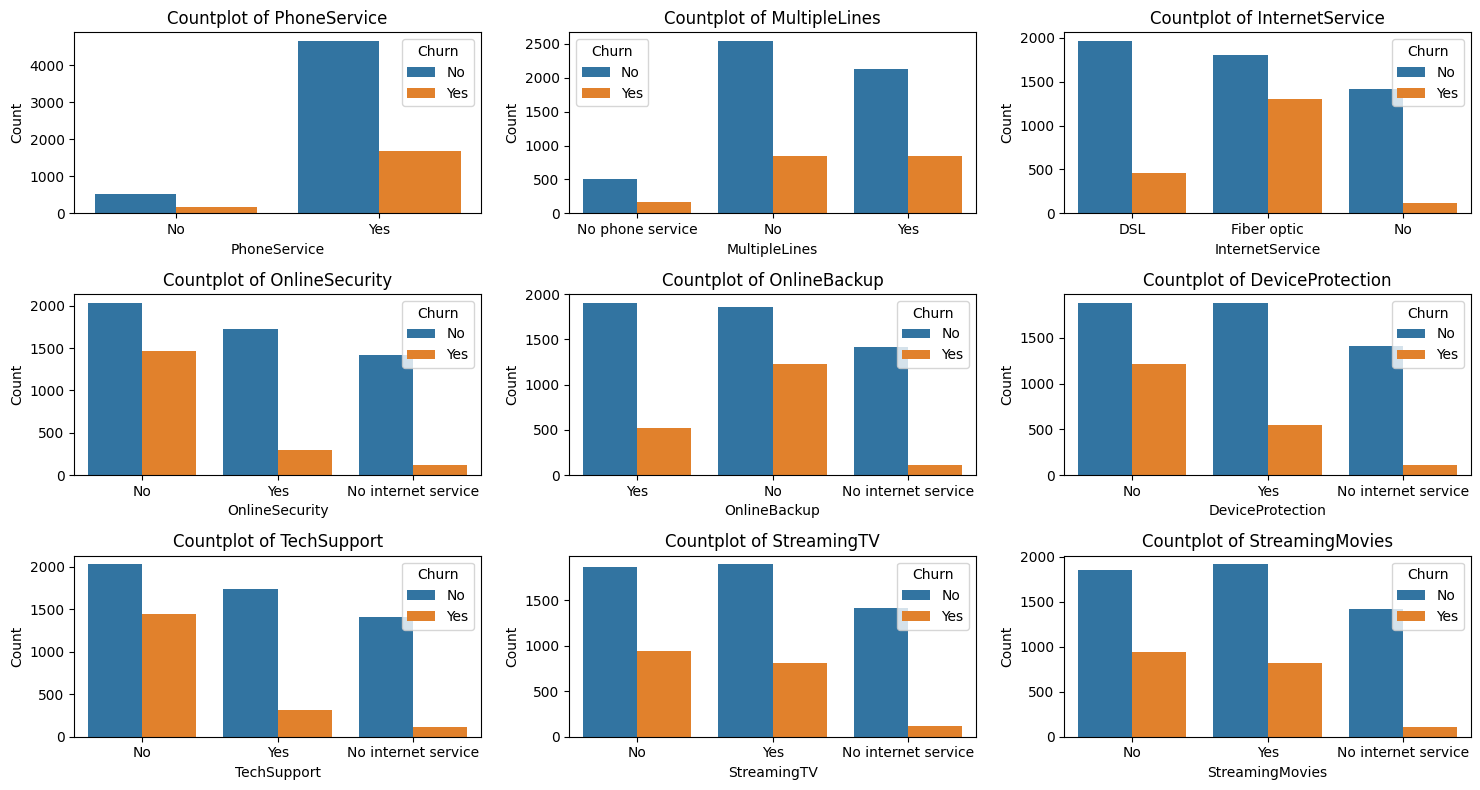

In [46]:
print(df.columns.values)

columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of rows and columns for the subplots (3 rows x 3 columns in this case for 9 plots)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# # Looping through each column and creating a count plot for each
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"])  # Create countplot
    axes[i].set_title(f"Countplot of {col}")  # Set title for each plot
    axes[i].set_xlabel(col)  # Set x-axis label
    axes[i].set_ylabel('Count')  # Set y-axis label

# # Adjusting the layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

### The "Fiber optic" internet service category shows a noticeable churn rate compared to "DSL." 
### Additionally, services like OnlineBackup, DeviceProtection, StreamingTV, and 
### StreamingMovies indicate that customers lacking these features are more prone to churn.

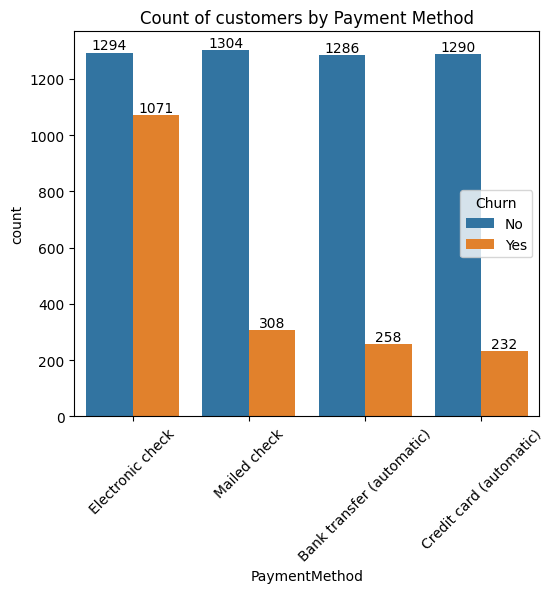

In [47]:

plt.figure(figsize=(6,5))
ax = sns.countplot(x="PaymentMethod", data = df, hue="Churn")

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.xticks(rotation=45)
plt.title("Count of customers by Payment Method")
plt.show()

### customer is likely to churn when he is using electronic check as a payment method